# Artificial Neural Network for Binary Classification of Accident Data

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset. We will use the accident data from Unfallatlas of Germany.
dataset = pd.read_csv('Unfallorte_Combined.csv')


In [10]:
dataset

,SN,District,Imperial_Circle,Community,Year,Month,Weekday,Hour,Road,Cycle,...,Motorcycle,Goods Vehicle,Others,Total,Collision Type,Accident Type,Light Condition,Road Condition,Accident_Severity,Severity
0,1,7,9,710,2016,2,4,16,0,0,...,1,0,0,2,2,2,0,3,3,0
1,2,1,19,140,2016,4,7,11,0,0,...,0,0,1,2,2,6,0,3,3,0
2,3,6,9,610,2016,1,2,13,0,0,...,0,0,0,2,6,4,0,3,2,1
3,4,1,1,102,2016,3,7,16,0,0,...,1,0,1,3,2,6,0,3,2,1
4,5,3,5,317,2016,2,1,18,0,0,...,0,0,0,1,9,1,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,21466,3,2,312,2018,12,6,17,0,0,...,0,0,0,2,6,7,3,1,3,0
21466,21467,3,1,310,2018,12,6,8,0,1,...,0,0,0,2,3,2,3,1,3,0
21467,21468,2,1,201,2018,12,6,14,0,0,...,0,0,0,1,2,7,3,1,3,0
21468,21469,1,3,105,2018,12,6,10,0,1,...,0,0,0,2,1,5,3,1,3,0


## A. Tool for Correlation between variables

In [11]:
corr_data = dataset[['District','Imperial_Circle','Community', 'Month', 'Weekday','Hour', 'Light Condition', 'Road Condition', 'Severity', 'Total']]
corr_data

,District,Imperial_Circle,Community,Month,Weekday,Hour,Light Condition,Road Condition,Severity,Total
0,7,9,710,2,4,16,0,3,0,2
1,1,19,140,4,7,11,0,3,0,2
2,6,9,610,1,2,13,0,3,1,2
3,1,1,102,3,7,16,0,3,1,3
4,3,5,317,2,1,18,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...
21465,3,2,312,12,6,17,3,1,0,2
21466,3,1,310,12,6,8,3,1,0,2
21467,2,1,201,12,6,14,3,1,0,1
21468,1,3,105,12,6,10,3,1,0,2


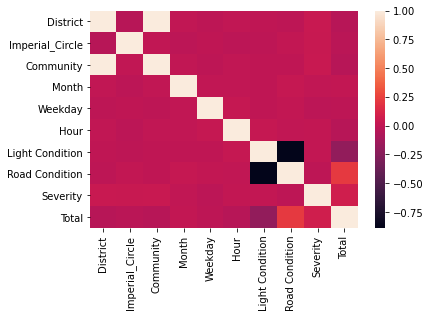

In [12]:
#First lets import the library
import seaborn as sns
corr = corr_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## B. Tools for Preprocessing of variables

### Convert categorical values into integers

In [13]:
#Take only those variables which can have effect to accident, 
#District(1),Imperial_Circle(2), Community(3), Month(5),Weekday(6),Hour(7), Light Condition(18) and Road Condition(19) and Severity
check = dataset.iloc[:, [1,2,3,5,6,7,18,19,-1]].columns
X = dataset.iloc[:, [1,2,3,5,6,7,18,19]].values 
y = dataset.iloc[:, [-1]].values
check

Index(['District', 'Imperial_Circle', 'Community', 'Month', 'Weekday', 'Hour',
       'Light Condition', 'Road Condition', 'Severity'],
      dtype='object')

In [14]:
#Check the types of the variables
print(X.dtype)
print(y.dtype)

int64
int64


### Fill out the missing values

In [15]:
print(np.isnan(X).any())
print(np.isnan(y).any())

False
False


## C. Tools for Modeling

## Split the data into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)
#It should be kept in mind never to use fit() function for testing set. 
#If it is used, fit() method will create a new scaler for testing set also.

In [18]:
#See the shape of training and testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16102, 8)
(5368, 8)
(16102, 1)
(5368, 1)


### Building the model

In [19]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:
# Initialize the constructor
classifier = Sequential()

# Add an input+hidden layer 
classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Add first hidden layer 
classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(rate = 0.3))

# Add second hidden layer 
classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(rate = 0.3))

# Add third hidden layer 
#classifier.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(rate = 0.3))

# Add an output layer 
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [21]:
# Model output shape
classifier.output_shape

# Model summary
classifier.summary()

# Model configuration
#classifier.get_config()

# List all weight tensors 
classifier.get_weights()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


[array([[-0.02139466, -0.02977877, -0.01343446, -0.02575888, -0.01994397],
        [ 0.0110788 , -0.03580685, -0.01877223,  0.00226227,  0.02123595],
        [ 0.04380604, -0.03686342,  0.017921  ,  0.01677981, -0.04025381],
        [ 0.00141595, -0.03293262,  0.00058319, -0.04833018,  0.02094451],
        [ 0.0392195 ,  0.0294704 ,  0.03381319, -0.02841702,  0.02640035],
        [ 0.01476157,  0.01112231, -0.02313279,  0.01453217, -0.03058726],
        [ 0.04722903,  0.03029453,  0.03824108, -0.0037159 , -0.04580723],
        [ 0.04152537, -0.00592498,  0.04100415, -0.00762299, -0.04820198]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.02900451,  0.00642338,  0.04556772, -0.03266777, -0.03020843],
        [-0.01440517,  0.04146104,  0.03392644,  0.00725701,  0.00505032],
        [-0.02506327, -0.0146725 , -0.04012086, -0.03320669, -0.03076803],
        [ 0.02190397, -0.01411793,  0.03687609, -0.01788257, -0.01867478],
        [-0.01657257, -0.044098

## Compiling and fitting the model

In [22]:
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
classifier.fit(X_train, y_train, epochs=75, batch_size=10, verbose=1)

Epoch 1/75
16102/16102 [==============================] - 2s 118us/step - loss: 0.5017 - accuracy: 0.8931
Epoch 2/75
16102/16102 [==============================] - 2s 101us/step - loss: 0.3609 - accuracy: 0.8934
Epoch 3/75
16102/16102 [==============================] - 2s 97us/step - loss: 0.3414 - accuracy: 0.8934
Epoch 4/75
16102/16102 [==============================] - 2s 98us/step - loss: 0.3396 - accuracy: 0.8934
Epoch 5/75
16102/16102 [==============================] - 2s 98us/step - loss: 0.3395 - accuracy: 0.8934
Epoch 6/75
16102/16102 [==============================] - 2s 97us/step - loss: 0.3395 - accuracy: 0.8934
Epoch 7/75
16102/16102 [==============================] - 2s 97us/step - loss: 0.3395 - accuracy: 0.8934
Epoch 8/75
16102/16102 [==============================] - 2s 107us/step - loss: 0.3394 - accuracy: 0.8934
Epoch 9/75
16102/16102 [==============================] - 2s 113us/step - loss: 0.3395 - accuracy: 0.8934
Epoch 10/75
16102/16102 [==========================

### Predicting

In [23]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Evaluating the model

In [24]:
#Lets begin with the scores of the model
loss, accuracy = classifier.evaluate(X_test, y_test,verbose=1)
print(f'The loss of the model is: {round(loss,2)} and the accuracy is: {round(accuracy,4)*100}%')

5368/5368 [==============================] - 0s 19us/step
The loss of the model is: 0.34 and the accuracy is: 89.53%


In [25]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
y_preds = y_pred>0.2
cm = confusion_matrix(y_test, y_preds)
overall_accu = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print(f'The overall accuracy is: {round(overall_accu,4)*100}%')

The overall accuracy is: 89.53%


In [26]:
# Precision 
precision_score(y_test, y_preds, zero_division = True)

1.0

In [27]:
# Recall
recall_score(y_test, y_preds, zero_division = True)

0.0

In [28]:
# F1 score
f1_score(y_test,y_preds, zero_division = True)

0.0

In [29]:
# Cohen's kappa
cohen_kappa_score(y_test, y_preds)

0.0

## Some Case Studies 

### Case Study 1 

In [34]:
#Analytical Questions
#District(1),Imperial_Circle(2), Community(3), Month(5),Weekday(6),Hour(7), Light Condition(18) and Road Condition(19) and Severity
#Q1. Which sort of accident occur in imperial circle 3, community 5 of district 4 at 11 am on saturday of July at morning when the road 
#is dry?
"""Solution:
    District - 4 ---[1,0,0,0,0,1,0]
    Imperial Circle - 3
    Community - 5
    Month - July - 7 --- [1,0,0,0,0,0,0,0,0,1,0,0]
    Weekday - Weekend - [0,0,0,0,0,0,0,0]
    Hour - 11
    Light Condition - Morning - 1 - [1]
    Road Condition - Dry - 0 - [0]
    """
test_data = [4,3,5,7,7,11,1,0]
test_pred = classifier.predict(scaler.transform([test_data]))
#new_data = [1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]
#new_pred = classifier.predict(sc.transform(np.array([new_data])))
test_pred = (test_pred>0.2)
print(f'There is tend to death at the said condition {test_pred}')
#There is tend to death at the said condition [[False]]

There is tend to death at the said condition [[False]]


In [32]:
test_pred

array([[0.10703121]], dtype=float32)

### Case Study 2 

In [35]:
#Analytical Questions
#District(1),Imperial_Circle(2), Community(3), Month(5),Weekday(6),Hour(7), Light Condition(18) and Road Condition(19) and Severity
#Q2. What is the probability of death on the dry road of district 3, imperial circle 2 of community 1 
#on monday morning at 8am of January?
"""Solution:
    District - 3 ---
    Imperial Circle - 3
    Community - 5
    Month - 1 -
    Weekday - 2 - 
    Hour - 8
    Light Condition - Morning - 1 - [1]
    Road Condition - Dry - 0 - [0]
    """
test_data = [3,3,5,1,2,8,1,0]
test_pred = classifier.predict(scaler.transform([test_data]))
#new_data = [1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]
#test_pred = classifier.predict(sc.transform(np.array([new_data])))
#test_pred = (new_pred>0.2)
print(f'The probability of death at the said condition is: {test_pred*100}')
#10.70%

The probability of death at the said condition is: [[10.703121]]


# Case Study 3 

In [37]:
#Analytical Questions
#District(1),Imperial_Circle(2), Community(3), Month(5),Weekday(6),Hour(7), Light Condition(18) and Road Condition(19) and Severity
#Q3. What is the probability of death during daytime at 12:00 in community 2, imperial circle 4 of district 6 during June wednesday 
#when the road is wet?
"""Solution:
    District - 6 ---
    Imperial Circle - 4
    Community - 2
    Month - 6 -
    Weekday - 4 - 
    Hour - 12
    Light Condition - Day - 0 - [0]
    Road Condition - Wet - 1 - [1]
    """
test_data = [6,4,2,6,4,12,0,1]
test_pred = classifier.predict(scaler.transform([test_data]))
#new_data = [1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]
#test_pred = classifier.predict(sc.transform(np.array([new_data])))
#test_pred = (new_pred>0.2)
print(f'The probability of death at the said condition is: {test_pred*100}')
#13.1%%

# Artificial Neural Network for Multiple Classification of Accident Data

In [124]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
dataset = pd.read_csv('Bremen_modified.csv')
#Fill the empty spaces and integer to represent 'NA'.
#In this data it has some null values in 'Traffic_Light_System' column.
#Hence we represent it with 2.
#Traffic light system: 2--->NA, 1--->Working and 0--->Out of order
dataset['Traffic_Light_System'].fillna(2, inplace = True)
dataset.loc[dataset['Traffic_Light_System'] == 8] = 1
dataset.loc[dataset['Traffic_Light_System'] == 9] = 0


## A. Tool for Correlation between variables

In [125]:
corr_data = dataset[['month','lighting_conditions', 'road_conditions', 'location', 'street_class', 'day_of_week', 'hour_cat', 'season', 'Traffic_Light_System','accident_category']]


In [126]:
dataset['accident_category'].unique()

array([5, 3, 1, 4, 2, 6, 0], dtype=int64)

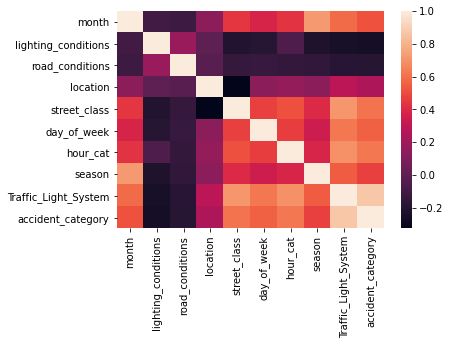

In [127]:
#First lets import the library
import seaborn as sns
corr = corr_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## B. Tools for Preprocessing of variables

In [136]:
#Take only those variables which can have effect to accident, 
#Month(3),Light Condition(9) and Road Condition(10), location(12), 
#street_class(13),Weekday(37), vacation(39), hour_cat(50), season(51), traffic_light_system(52)
check = dataset.iloc[:, [3,9,10,12,13,14,37,39, 50, 51, 52]].columns 
X_ = dataset.iloc[:, [3,9,10,12,13,37,50,51,52]].values 
y_ = dataset.iloc[:, [14]].values
check

Index(['month', 'lighting_conditions', 'road_conditions', 'location',
       'street_class', 'accident_category', 'day_of_week', 'vacation',
       'hour_cat', 'season', 'Traffic_Light_System'],
      dtype='object')

In [138]:
#Check the types of the variables
print(X_.dtype)
print(y_.dtype)

float64
int64


### Convert categorical values into integers

### Fill out the missing values

### Convert the dependent variable into categories 

In [141]:
import collections

a = np.array(dataset)
b = collections.Counter(dataset['accident_category'])
b

Counter({5: 21715, 3: 4831, 1: 6783, 4: 730, 2: 661, 6: 191, 0: 361})

In [142]:
#Import the required libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import np_utils
#import sklearn.utils.validation

In [162]:
y_ = dataset.iloc[:, [14]].values
y_ = y_.ravel()
encoder = LabelEncoder()
#encoder.fit(y)
encoded_y = encoder.fit_transform(y_)
# convert integers to dummy variables (i.e. one hot encoded)
y_ = np_utils.to_categorical(encoded_y)

In [165]:
y_.shape
X_.shape

(35272, 9)

## C. Tools for Modeling

## Split the data into train and test

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = 0)

In [167]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)
#It should be kept in mind never to use fit() function for testing set. 
#If it is used, fit() method will create a new scaler for testing set also.

In [168]:
#See the shape of training and testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28217, 9)
(7055, 9)
(28217, 7)
(7055, 7)


### Building the model

In [169]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [170]:
# Initialize the constructor
classifier = Sequential()

# Add an input+hidden layer 
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))

# Add first hidden layer 
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(rate = 0.3))

# Add second hidden layer 
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(rate = 0.3))

# Add third hidden layer 
#classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(rate = 0.3))

# Add an output layer 
classifier.add(Dense(7, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [172]:
# Model output shape
classifier.output_shape

# Model summary
classifier.summary()

# Model configuration
classifier.get_config()

# List all weight tensors 
classifier.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 63        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


[array([[-0.03611917,  0.01009812, -0.04977904,  0.02509824, -0.0389112 ,
          0.03268832, -0.00483315, -0.0135016 ],
        [-0.01707311,  0.03573778,  0.02328708,  0.04940968,  0.01049651,
          0.03830342,  0.00475037,  0.01743997],
        [ 0.01816064,  0.03972795, -0.0421914 ,  0.03257842, -0.0324412 ,
         -0.03615168,  0.01488013,  0.02419344],
        [-0.01338985,  0.01110134,  0.04950127,  0.02190221,  0.0347605 ,
          0.00556065, -0.03170203, -0.01818625],
        [-0.03367292,  0.04531637, -0.04982729,  0.01281477, -0.00927939,
          0.0477411 ,  0.04094234,  0.0462489 ],
        [-0.01975135, -0.01608164,  0.01609418, -0.00566014,  0.01588279,
         -0.01185561, -0.00143613,  0.04882767],
        [-0.04247141, -0.04345937, -0.00649829,  0.04247237,  0.02131499,
          0.01816144, -0.01973163,  0.02055135],
        [-0.02223524, -0.00251583, -0.01792654,  0.0450976 ,  0.02255063,
          0.00793964, -0.01843362, -0.00633808],
        [-0.0102

## Compiling and fitting the model

In [173]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
classifier.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
28217/28217 [==============================] - 4s 150us/step - loss: 0.8424 - accuracy: 0.73070s - loss: 0.893
Epoch 2/50
28217/28217 [==============================] - 3s 96us/step - loss: 0.5900 - accuracy: 0.8114
Epoch 3/50
28217/28217 [==============================] - 3s 96us/step - loss: 0.5771 - accuracy: 0.8179
Epoch 4/50
28217/28217 [==============================] - 3s 98us/step - loss: 0.5746 - accuracy: 0.8179
Epoch 5/50
28217/28217 [==============================] - 3s 94us/step - loss: 0.5731 - accuracy: 0.8179
Epoch 6/50
28217/28217 [==============================] - 3s 97us/step - loss: 0.5727 - accuracy: 0.8179
Epoch 7/50
28217/28217 [==============================] - 3s 98us/step - loss: 0.5715 - accuracy: 0.8179
Epoch 8/50
28217/28217 [==============================] - 3s 96us/step - loss: 0.5708 - accuracy: 0.8179
Epoch 9/50
28217/28217 [==============================] - 3s 95us/step - loss: 0.5705 - accuracy: 0.8179
Epoch 10/50
28217/28217 [=============

## Predicting

In [175]:
y_pred = classifier.predict(X_test)


In [176]:
#y_pred = y_pred>0.2
y_pred[:10],y_test[:10]

(array([[4.1344088e-18, 9.2208444e-04, 2.1833414e-02, 1.3183416e-01,
         2.4224961e-02, 6.4282197e-01, 7.5532724e-03],
        [2.0640197e-22, 1.9982322e-04, 1.4586992e-02, 9.6023127e-02,
         1.5475470e-02, 6.1235613e-01, 4.1390439e-03],
        [6.0820946e-19, 1.1828132e-03, 2.7333288e-02, 1.7848596e-01,
         2.4803627e-02, 7.5790352e-01, 7.1906522e-03],
        [1.8593946e-22, 7.0612255e-04, 2.7530745e-02, 2.1271019e-01,
         1.9018115e-02, 8.5481405e-01, 4.3741078e-03],
        [3.1460813e-20, 6.7369308e-04, 2.0896798e-02, 1.3846067e-01,
         1.9724393e-02, 7.0758462e-01, 5.1402720e-03],
        [1.1471232e-06, 7.2337836e-01, 3.7733017e-07, 5.7950349e-08,
         2.5370340e-05, 3.1466590e-07, 6.7011652e-10],
        [2.5843134e-21, 1.0118494e-03, 3.1694029e-02, 2.3375633e-01,
         2.2330116e-02, 8.5872722e-01, 5.6223287e-03],
        [5.5933805e-16, 7.3850912e-04, 2.3113510e-02, 1.3798927e-01,
         2.6981933e-02, 6.1030728e-01, 1.1960580e-02],
        

Evaluate the model

In [178]:
score = classifier.evaluate(X_test, y_test,verbose=1)

print(score)

7055/7055 [==============================] - 0s 41us/step
[0.5707580119265807, 0.8160170316696167]


- The confusion matrix is a table which depicts correct and incorrect predictions. It will include the false positives and false negative classification as well. The diagonal values are correct ones while the rest are incorrect ones.
- Precision measures the 'exactness' of the model. Higher precision value means higher accuracy of the model.
- Recall  measures the 'completeness' of the model. Higher recall value means higher coverage of the model.
- The F1 Score also called as F-score gives the 'weighted average of precision and recall'. Higher F1 score means higher accuracy and coverage.
- The Kappa also called as Cohen’s kappa gives the accuracy of classification normalized by the 'imbalance of the classes in the data'.

In the section below, we compute each one of these to quantify the strength of our model.

In [181]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
predictions = np.argmax(y_pred, axis=1) 
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(cm)

[[  61    0    0    0    0    0    0]
 [   0 1311    0    0    0    4    0]
 [   0    0    0    0    0  127    0]
 [   0    0    0    0    0  987    0]
 [   0    0    0    0    0  142    0]
 [   0    0    0    0    0 4385    0]
 [   0    0    0    0    0   38    0]]


In [182]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('Micro Precision: {:.2f}'.format(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro', zero_division = True)))
print('Macro Recall: {:.2f}'.format(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro', zero_division = True)))
print('Macro F1-score: {:.2f}\n'.format(f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro', zero_division = True)))

print('Weighted Precision: {:.2f}'.format(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7'], zero_division = True))



Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.97
Macro Recall: 0.43
Macro F1-score: 0.41

Weighted Precision: 0.67
Weighted Recall: 0.82
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        61
     Class 2       1.00      1.00      1.00      1315
     Class 3       1.00      0.00      0.00       127
     Class 4       1.00      0.00      0.00       987
     Class 5       1.00      0.00      0.00       142
     Class 6       0.77      1.00      0.87      4385
     Class 7       1.00      0.00      0.00        38

    accuracy                           0.82      7055
   macro avg       0.97      0.43      0.41      7055
weighted avg       0.86      0.82      0.74      7055



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion 